# **Preprocessing and Processing - OCD study**

#1- Installing packages :

In [1]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.5 MB 24.1 MB/s 


In [11]:
import pandas as pd
import numpy as np
import mne
#from mne_connectivity import spectral_connectivity_epochs
#from mne_connectivity.viz import plot_sensors_connectivity
#from mne_features.feature_extraction import extract_features

# add plot inline in the page
%matplotlib inline

import matplotlib.pyplot as plt


mne.set_log_level('WARNING')


In [9]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Loading data :

In [4]:
raw = mne.io.read_raw_cnt('/content/drive/MyDrive/EEG_OCD_DNMS/032.cnt', preload=True, data_format='int16')

/usr/local/lib/python3.7/dist-packages/mne/channels/layout.py:812: RuntimeWarning: invalid value encountered in true_divide
  xs /= sqs  # Shape to a sphere and normalize
/usr/local/lib/python3.7/dist-packages/mne/channels/layout.py:813: RuntimeWarning: invalid value encountered in true_divide
  ys /= sqs


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


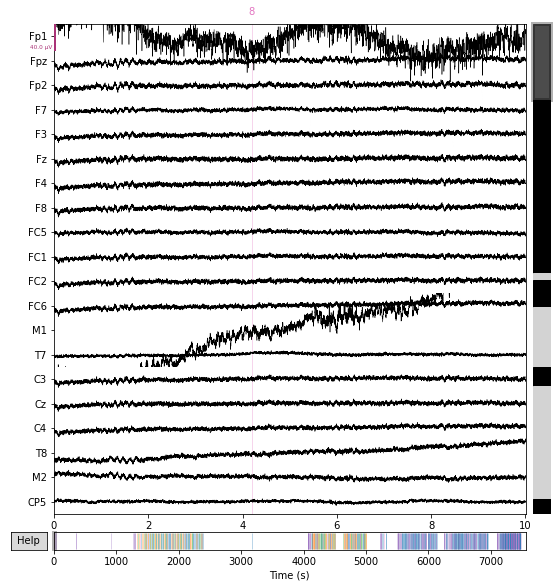

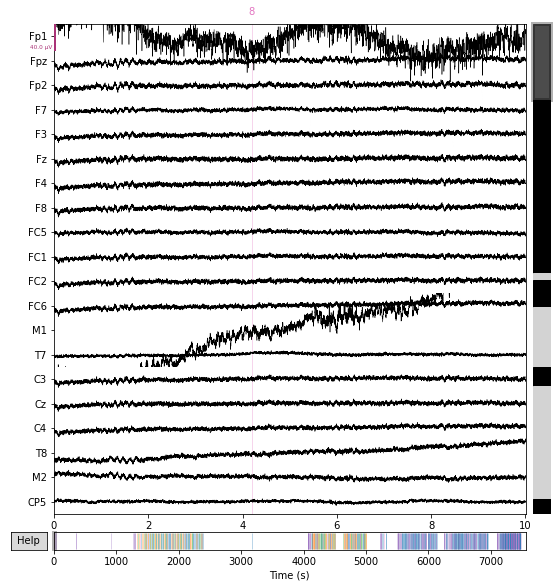

In [12]:
raw.plot()

# Setting Montage

In [ ]:
# reading electrodes position for ANT Waveguard 128 cap - from ASA  
standard_montage=mne.channels.read_custom_montage('/content/drive/MyDrive/EEG_OCD_DNMS/standard_128_1005.elc', head_size=0.095, coord_frame=None)

In [ ]:
print(raw.ch_names)
print(raw.info)
n_channels = len(standard_montage.ch_names)
print(n_channels)

['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2', 'AF7', 'AF3', 'AF4', 'AF8', 'F5', 'F1', 'F2', 'F6', 'FC3', 'FCz', 'FC4', 'C5', 'C1', 'C2', 'C6', 'CP3', 'CPz', 'CP4', 'P5', 'P1', 'P2', 'P6', 'PO5', 'PO3', 'PO4', 'PO6', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'FT9', 'FT10', 'TPP9h', 'TPP10h', 'PO9', 'PO10', 'P9', 'P10', 'AFF1', 'AFz', 'AFF2', 'FFC5h', 'FFC3h', 'FFC4h', 'FFC6h', 'FCC5h', 'FCC3h', 'FCC4h', 'FCC6h', 'CCP5h', 'CCP3h', 'CCP4h', 'CCP6h', 'CPP5h', 'CPP3h', 'CPP4h', 'CPP6h', 'PPO1', 'PPO2', 'I1', 'Iz', 'I2', 'AFp3h', 'AFp4h', 'AFF5h', 'AFF6h', 'FFT7h', 'FFC1h', 'FFC2h', 'FFT8h', 'FTT9h', 'FTT7h', 'FCC1h', 'FCC2h', 'FTT8h', 'FTT10h', 'TTP7h', 'CCP1h', 'CCP2h', 'TTP8h', 'TPP7h', 'CPP1h', 'CPP2h', 'TPP8h', 'PPO9h', 'PPO5h', 'PPO6h', 'PPO10h', 'POO9h', 'POO3h', 'POO4h', 'POO10h', 'OI1h', 'OI2h', 'HEOG', 'VEOG']
<Info | 9 non-e

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 

Creating RawArray with float64 data, n_channels=129, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


<ipython-input-14-a23914a6a78c>:1: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  standard_montage.plot(show_names=True, sphere=(-0.02570911, -0.00050228,  0.0907444, 0.25))


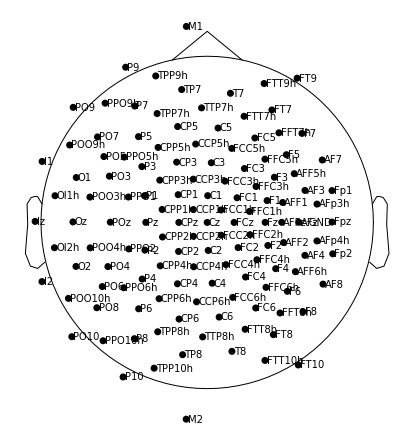

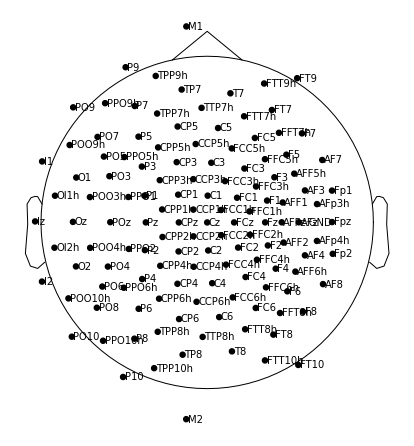

In [ ]:
standard_montage.plot(show_names=True, sphere=(-0.02570911, -0.00050228,  0.0907444, 0.25))

Creating RawArray with float64 data, n_channels=129, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


<ipython-input-15-7040d11a88c8>:1: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(standard_montage, on_missing='ignore')
<ipython-input-15-7040d11a88c8>:2: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  montage = mne.viz.plot_montage(standard_montage, kind='3d', show=False)


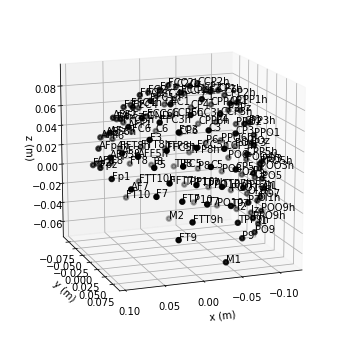

In [ ]:
raw.set_montage(standard_montage, on_missing='ignore')
montage = mne.viz.plot_montage(standard_montage, kind='3d', show=False)
montage = montage.gca().view_init(azim=70, elev=15)  # set view angle for tutorial

In [ ]:
print(standard_montage.get_positions())

{'ch_pos': OrderedDict([('AFFz:GND', array([ 0.06513741, -0.00033989,  0.06382229])), ('Fp1', array([0.08888072, 0.02873955, 0.01312785])), ('Fpz', array([ 0.09197387, -0.00015484,  0.01741743])), ('Fp2', array([ 0.09021298, -0.02948356,  0.01317737])), ('F7', array([0.04871787, 0.06943757, 0.00289342])), ('F3', array([0.04864682, 0.04949361, 0.05308589])), ('Fz', array([ 0.04904204, -0.00039843,  0.07417142])), ('F4', array([ 0.04968111, -0.05138191,  0.05189161])), ('F8', array([ 0.05013512, -0.07118995,  0.00272793])), ('FC5', array([0.01732513, 0.07574445, 0.03137195])), ('FC1', array([0.01416458, 0.03245577, 0.08169214])), ('FC2', array([ 0.01480768, -0.03346591,  0.08029735])), ('FC6', array([ 0.01860001, -0.07858625,  0.03117125])), ('M1', array([-0.03470063,  0.08402827, -0.06391955])), ('T7', array([-0.01090611,  0.08181336, -0.00577545])), ('C3', array([-0.02134362,  0.06289284,  0.06074477])), ('Cz', array([-0.02570911, -0.00050228,  0.0907444 ])), ('C4', array([-0.02045938,

# Resampling: 

Recording online at 1024Hz. 
Downsampling to 256 Hz.

In [ ]:
raw_resampled=raw.resample(256, npad="auto")
print(raw_resampled.info)

<Info | 10 non-empty values
 bads: 48 items (TPP9h, TPP10h, FFC5h, FFC3h, FFC4h, FFC6h, FCC5h, ...)
 ch_names: Fp1, Fpz, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, M1, T7, ...
 chs: 130 EEG
 custom_ref_applied: False
 dig: 128 items (128 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2022-06-08 11:34:15 UTC
 nchan: 130
 projs: []
 sfreq: 256.0 Hz
 subject_info: 5 items (dict)
>


In [ ]:
raw_resampled.drop_channels(['HEOG', 'VEOG'])

<RawCNT | 032.cnt, 128 x 1934170 (7555.3 s), ~1.84 GB, data loaded>

# Filtering: 
Applying a notch filter of 50Hz, bandpass between 0.01 and 60Hz, and a FIR (finite impulse response) filter (butterworth filter) with a zero phase

In [ ]:
raw_filtered = raw_resampled.notch_filter(50).filter(0.01, 60, method='fir', iir_params=None, phase='zero')

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidt

In [ ]:
raw_filtered.set_montage(standard_montage, on_missing='ignore')

<ipython-input-20-3ad138285fdf>:1: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw_filtered.set_montage(standard_montage, on_missing='ignore')


<RawCNT | 032.cnt, 128 x 1934170 (7555.3 s), ~1.84 GB, data loaded>

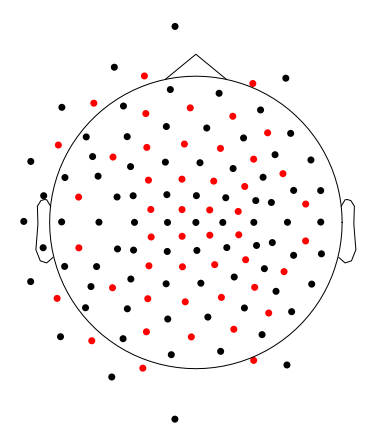

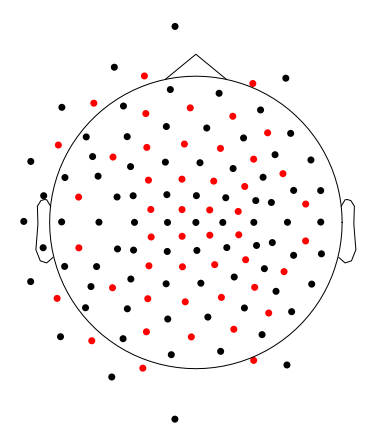

In [ ]:
raw_filtered.plot_sensors(sphere=(-0.02570911, -0.00050228,  0.0907444, 0.22))

# Re-referencing with the average reference

In [ ]:
raw_filtered.set_eeg_reference('average', projection=True).apply_proj() 

Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...


<RawCNT | 032.cnt, 128 x 1934170 (7555.3 s), ~1.84 GB, data loaded>

# Frequency Domain analysis:

## Power Spectral Density 

Effective window size : 8.000 (s)


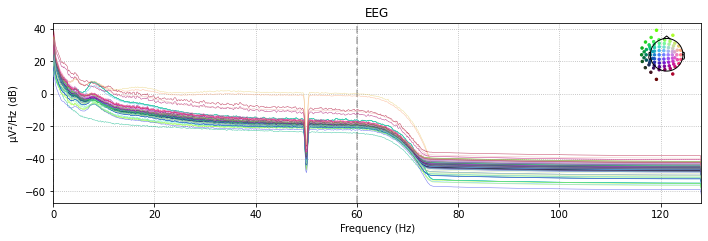

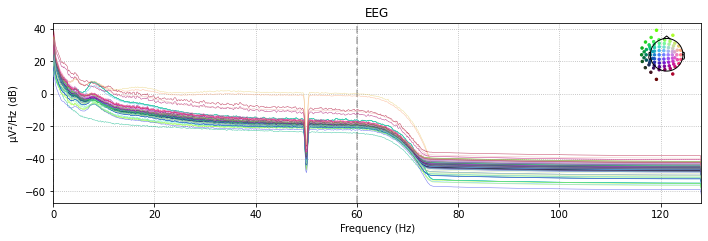

In [ ]:
raw_filtered.plot_psd(spatial_colors=True)


# Cropping Data:

Cropping the data into 5 segments, each one of them correspond to the recording of one cognitive task.
Thus the 5 cognitive tasks are : Resting state, Seven differences Task, Lucifer Task, Where is tockie task, Symmetry task. *texte en italique*

In [ ]:
#rs ends at 00:22:00
data_rs = raw_filtered.copy().crop(tmin=0.0, tmax=1320, include_tmax=True, verbose=None)

In [ ]:
# seven diff task starts at 00:22:59 and ends at 1:28:00
data_seven_diff = raw_filtered.copy().crop(tmin=1379, tmax=5280, include_tmax=True, verbose=None)

In [ ]:
# lucifer  task starts at 1:28:05 and ends at 1:45:00
data_lucifer = raw_filtered.copy().crop(tmin=5285, tmax=6300, include_tmax=True, verbose=None)

In [ ]:
# where is tockie  task starts at 1:45:36 and ends at 1:58:00
data_where_is_tockie = raw_filtered.copy().crop(tmin=6336, tmax=7080, include_tmax=True, verbose=None)

In [ ]:
# Lucifer  task starts at 1:58:48 and ends at 2:05:55
data_symmetry = raw_filtered.copy().crop(tmin=7128, tmax=7555, include_tmax=True, verbose=None)

# Analysing Resting State Data:

## Epoching:

In [ ]:
tmin = -0.2
tmax = 1
baseline = (None, 0)
events, event_id = mne.events_from_annotations(data_rs)
epochs_rs = mne.Epochs(data_rs,
                    events=events,
                    event_id=event_id,
                    tmin=tmin,
                    tmax=tmax,
                    baseline=baseline,
                    preload=True)

Used Annotations descriptions: ['64', '8']
Not setting metadata
11 matching events found
Setting baseline interval to [-0.19921875, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 11 events and 308 original time points ...
0 bad epochs dropped


Opening epochs-browser...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


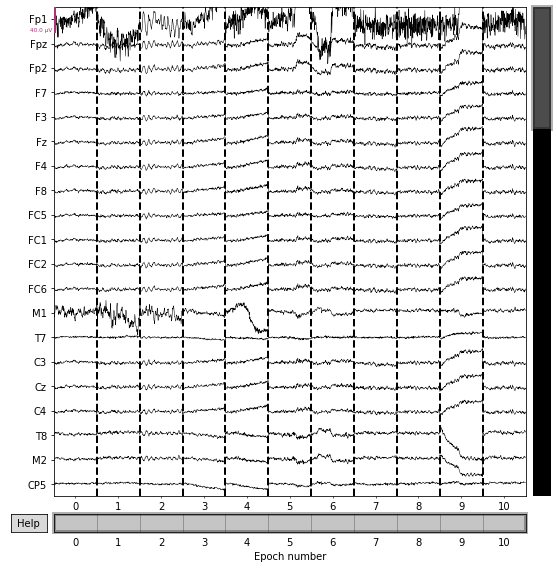

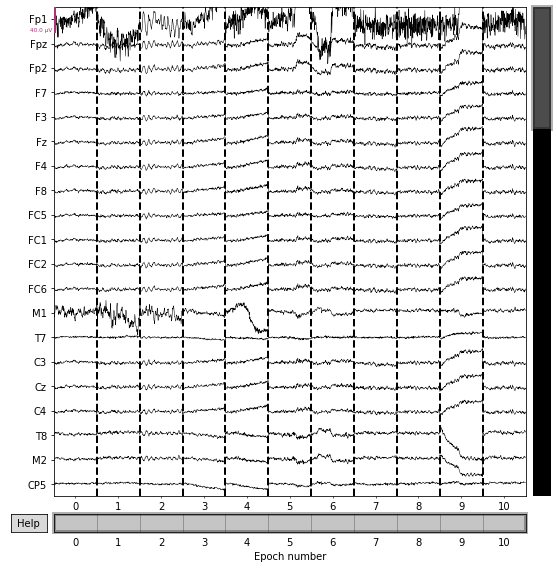

In [ ]:
epochs_rs.plot()

# Removing artifacts by applying Independant Component Analysis (fast ICA)  

In [ ]:
ica = mne.preprocessing.ICA(n_components=15, max_iter='auto', random_state=97)
ica.fit(epochs_rs)
ica

Fitting ICA to data using 80 channels (please be patient, this may take a while)
    Applying projection operator with 1 vector (pre-whitener computation)
    Applying projection operator with 1 vector (pre-whitener application)
Selecting by number: 15 components


<ipython-input-31-6657f03050a8>:2: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs_rs)


    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 0.5s.


Method,fastica
Fit,18 iterations on epochs (3388 samples)
ICA components,15
Explained variance,99.6 %
Available PCA components,80
Channel types,eeg
ICA components marked for exclusion,—


    Applying projection operator with 1 vector (pre-whitener application)
Not setting metadata
11 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Opening ica-browser...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


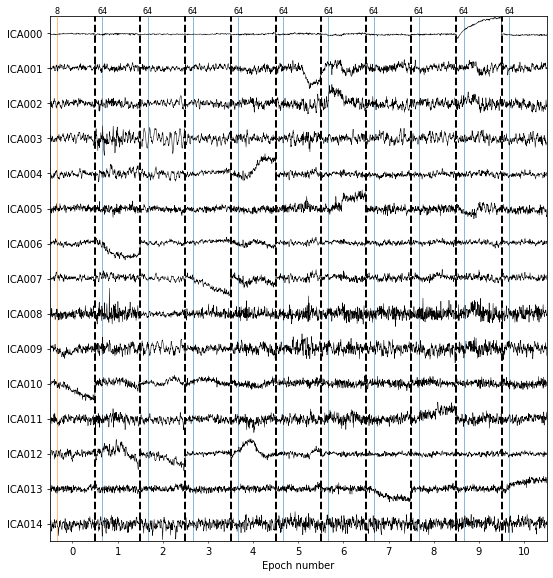

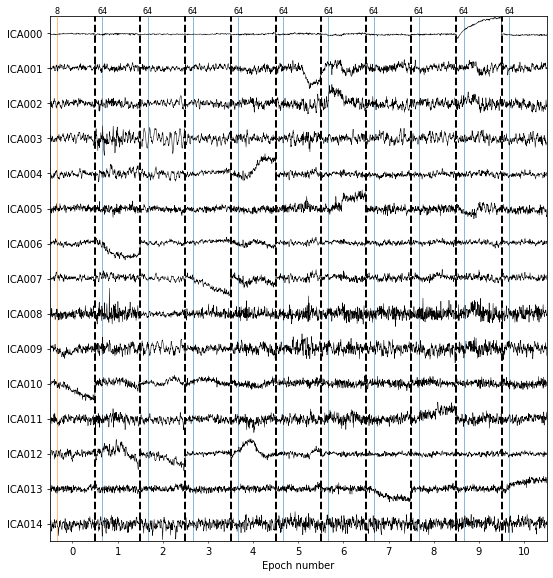

In [ ]:
ica.plot_sources(epochs_rs, show_scrollbars=False)

In [ ]:
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)

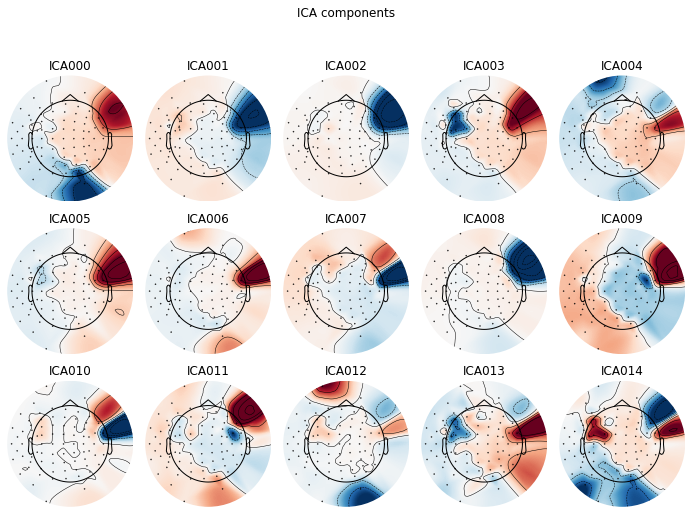

[<MNEFigure size 702x526.68 with 15 Axes>]

In [ ]:
ica.plot_components()

    Applying projection operator with 1 vector (pre-whitener application)
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
11 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
11 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
11 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
11 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
11 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


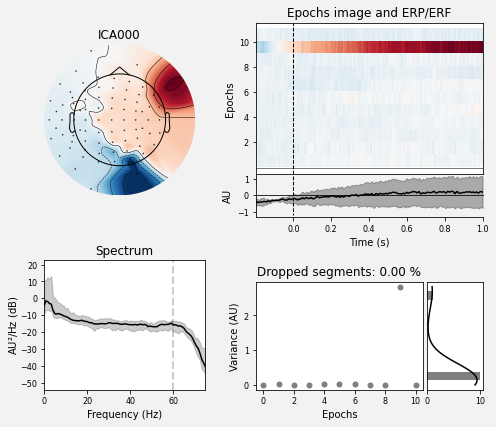

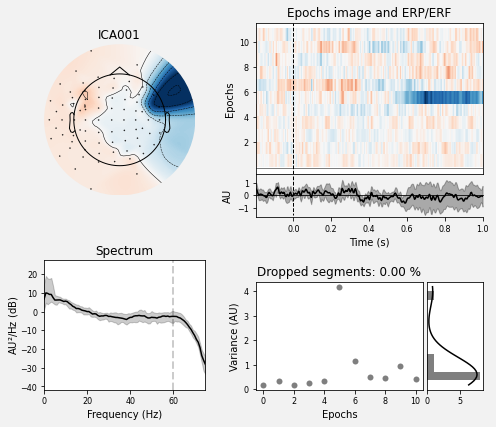

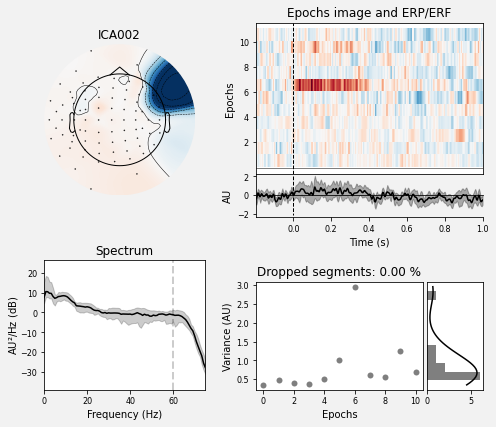

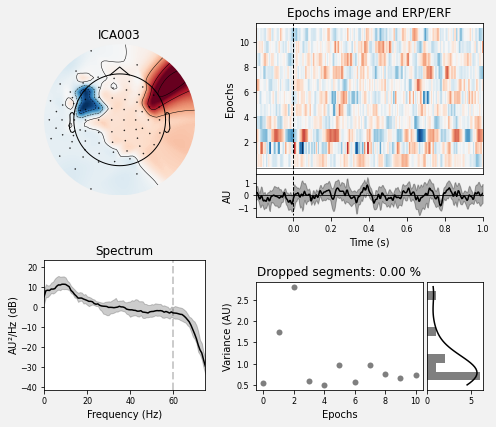

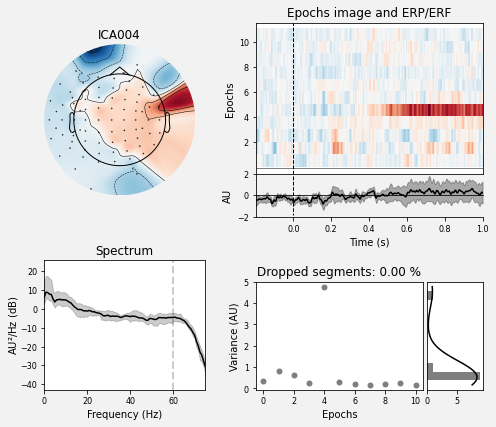

[<Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>]

In [ ]:
ica.plot_properties(epochs_rs)

In [ ]:
#ica.exclude = [0, 1]

    Using multitaper spectrum estimation with 7 DPSS windows


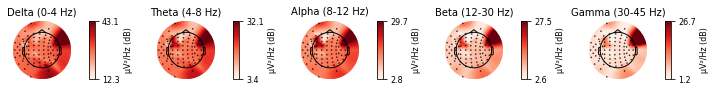

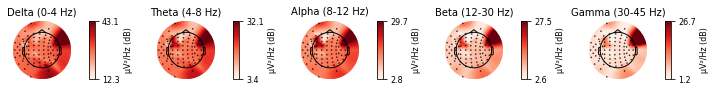

In [ ]:
epochs_rs.plot_psd_topomap()

## Interpolating bad epochs 

In [ ]:
epochs_rs_good = epochs_rs.interpolate_bads(reset_bads=False)

Interpolating bad channels
    Automatic origin fit: head of radius 97.2 mm
Computing interpolation matrix from 80 sensor positions
Interpolating 48 sensors


0 bad epochs dropped
Projections have already been applied. Setting proj attribute to True.


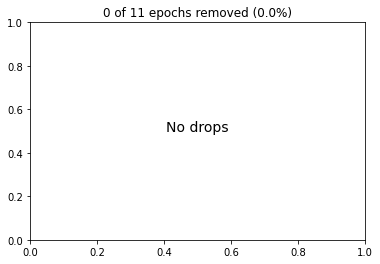

In [ ]:
reject_criteria = dict(eeg=150e-6)       # 150 µV

flat_criteria = dict(eeg=1e-6)           # 1 µV
epochs_rs_good.drop_bad(reject=reject_criteria, flat=flat_criteria)
epochs_rs_good.plot_drop_log()
epochs_rs_clean = epochs_rs_good.copy().apply_proj()


    Using multitaper spectrum estimation with 7 DPSS windows


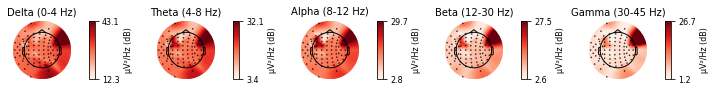

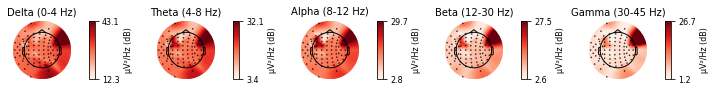

In [ ]:
epochs_rs_clean.plot_psd_topomap()

    Using multitaper spectrum estimation with 7 DPSS windows


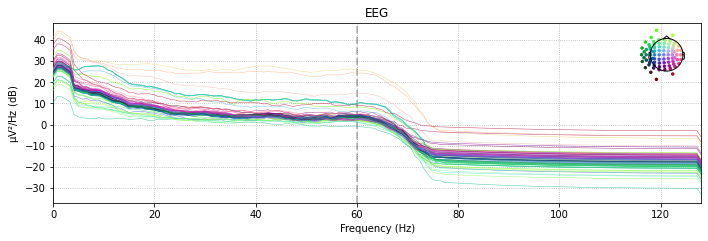

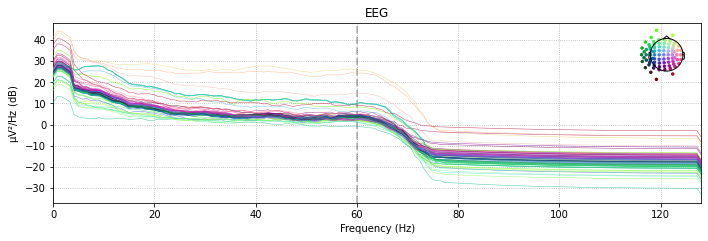

In [ ]:
epochs_rs_clean.plot_psd()

# Processing 

#Time Domain Analysis

In [ ]:
import mne_features

ModuleNotFoundError: ignored

In [ ]:
from mne_features.feature_extraction import extract_features
from mne_features.feature_extraction import FeatureExtractor

In [ ]:
mne_features.univariate.compute_mean(data_rs)
mne_features.univariate.compute_variance(data_rs)
mne_features.univariate.compute_skewness(data_rs)
mne_features.univariate.compute_kurtosis(data_rs)
mne_features.univariate.compute_hjorth_mobility_spect(sfreq, data_rs, normalize=False, psd_method='welch', psd_params=None)
mne_features.univariate.compute_hjorth_complexity(data_rs)
mne_features.univariate.compute_hjorth_complexity_spect(sfreq, data_rs, normalize=False, psd_method='welch', psd_params=None)¶¶


# Entropy / Complexity

In [ ]:
mne_features.univariate.compute_app_entropy(epochs_rs_clean, emb=2, metric='chebyshev')
mne_features.univariate.compute_pow_freq_bands(sfreq, epochs_rs_clean, freq_bands=array([0.5, 4., 8., 13., 30., 100.]), normalize=True, ratios=None, ratios_triu=False, psd_method='welch', log=False, psd_params=None)


In [ ]:
# Connectivity
fmin, fmax = 4., 9.
sfreq = data_rs.info['sfreq']  # the sampling frequency
tmin = 0.0  # exclude the baseline period
#epochs_rs.load_data().pick_types('eeg')  # just keep MEG and no EOG now
con = spectral_connectivity_epochs(
    epochs_rs, method='pli', mode='multitaper', sfreq=sfreq, fmin=fmin, fmax=fmax,
    faverage=True, tmin=tmin, mt_adaptive=False, n_jobs=1)

# Now, visualize the connectivity in 3D:
plot_sensors_connectivity(
    epochs_rs.info,
    con.get_data(output='dense')[:, :, 0])

In [ ]:
#Microstate analysis

import mne
import mne_microstates

ica = mne.preprocessing.ICA(0.99).fit(data_rs)
data_rs_clean = ica.apply(data_rs)

# Select sensor type
raw.pick_types(meg=False, eeg=True)

# Segment the data into 5 microstates
maps, segmentation, polarity = mne_microstates.segment(data_rs_clean.get_data(), n_states=5,
                                                       random_state=0,
                                                       return_polarity=True)
    
# Plot the topographic maps of the microstates and part of the segmentation
mne_microstates.plot_maps(maps, data_rs_clean.info)
mne_microstates.plot_segmentation(segmentation[:500], data_rs_clean.get_data()[:, :500],
                                  raw.times[:500], polarity=polarity[:500])